In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
from matplotlib.colors import ListedColormap
from collections import OrderedDict

In [138]:
lighter_palette = [ '#332288', '#117733', '#44AA99', '#88CCEE', '#DDCC77', '#CC6677', '#AA4499', '#882255', '#7766DD', '#55BB88', '#88DDCC', '#CCEEFF', '#FFF0AA', '#EE99AA', '#DD88CC', '#CC6688', '#A090EE', '#77DDAA', '#DDF9EE', '#D0E8FF', '#9988DD', '#66CC77', '#99EEDD', '#FFDDAA', '#EEAACC', '#BB99EE', '#8877CC', '#33AA55', '#77CCAA', '#AADDFF', '#FFE4AA', '#DD99BB', '#BBAAFF', '#55AA88', '#99CFFF', '#FFC8DD' ] 
lighter_palette = [ '#FFC8DD', '#88CCEE', '#77DDAA', '#EE99AA', '#DDF9EE', '#9988DD', '#99CFFF', '#CC6677', '#77CCAA', '#EEAACC', '#CCEEFF', '#117733', '#DD88CC', '#8877CC', '#7766DD', '#332288', '#DDCC77', '#33AA55', '#AA4499', '#A090EE', '#FFDDAA', '#882255', '#88DDCC', '#BB99EE', '#AADDFF', '#CC6688', '#44AA99', '#66CC77', '#D0E8FF', '#FFE4AA', '#DD99BB', '#FFF0AA', '#BBAAFF', '#55AA88', '#55BB88', '#99EEDD'] 

lighter_palette = [  '#DDF9EE', '#9988DD', '#99CFFF', '#CC6677', '#77CCAA', '#EEAACC', '#CCEEFF', '#117733', '#DD88CC', '#8877CC', '#7766DD', '#332288', '#DDCC77', '#33AA55', '#AA4499', '#A090EE', '#FFDDAA', '#882255', '#88DDCC', '#BB99EE', '#AADDFF', '#FFC8DD', '#88CCEE', '#77DDAA', '#EE99AA','#CC6688', '#44AA99', '#66CC77', '#D0E8FF', '#FFE4AA', '#DD99BB', '#FFF0AA', '#BBAAFF', '#55AA88', '#55BB88', '#99EEDD'] 


In [ ]:
# l2_results_path ="/Users/balarad/Workspace/Data/GuardIon/community_kmedoids_manhattan_k_6_random_seed_1.csv"
#l2_results_path = "/Users/balarad/Workspace/Data/GuardIon/community_kmeans_k_6random_seed_11.csv"
# l2_results_path ="/Users/balarad/Downloads/community_kmedoids_k_6random_seed_0_max_12.csv"
l2_results_path ='results/community_kmedoids_k_6_random_seed_0_max_12.csv'

In [7]:
df = pd.read_csv(l2_results_path)
df.drop(columns=['Unnamed: 0'], inplace=True)
df_cleaned = df[df['cluster'] != -1]
df_cleaned.dropna(subset=['cluster'], inplace=True) 

C:\Users\dvusuet\AppData\Local\Temp\1\ipykernel_23432\3928905965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.dropna(subset=['cluster'], inplace=True)


In [8]:
print (df_cleaned.head(4), df_cleaned["community"].unique())

                                            vin  week  cluster  index  \
0  ++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=     0        5      0   
1  ++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=     1        1      1   
2  ++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=     2        0      2   
3  ++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=     3        1      3   

         date  community  
0  2019-05-27        2.0  
1  2019-06-03        2.0  
2  2019-06-10        2.0  
3  2019-06-17        2.0   [ 2.  7.  8.  3.  1.  4.  9. 11.  0.]


In [9]:
df_sorted = df_cleaned.sort_values(['vin', 'week'])
df_sorted.head()

,vin,week,cluster,index,date,community
0,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,0,5,0,2019-05-27,2.0
1,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,1,1,1,2019-06-03,2.0
2,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,2,0,2,2019-06-10,2.0
3,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,3,1,3,2019-06-17,2.0
4,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,4,5,4,2019-06-24,2.0


In [ ]:
df_sorted['next_cluster'] = df_sorted.groupby('vin')['cluster'].shift(-1).fillna(-1)
df_sorted['next_next_cluster'] = df_sorted.groupby('vin')['cluster'].shift(-2).fillna(-1)
df_sorted['next_next_next_cluster'] = df_sorted.groupby('vin')['cluster'].shift(-3).fillna(-1)
df_sorted.head()

,vin,week,cluster,index,date,community,next_cluster,next_next_cluster,next_next_next_cluster
0,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,0,5,0,2019-05-27,2.0,1.0,0.0,1.0
1,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,1,1,1,2019-06-03,2.0,0.0,1.0,5.0
2,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,2,0,2,2019-06-10,2.0,1.0,5.0,2.0
3,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,3,1,3,2019-06-17,2.0,5.0,2.0,2.0
4,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,4,5,4,2019-06-24,2.0,2.0,2.0,4.0


In [11]:
df_transitions = df_sorted.dropna(subset=['next_cluster'])
df_transitions["next_cluster"] = df_transitions["next_cluster"].astype(int)
df_transitions["next_next_cluster"] = df_transitions["next_next_cluster"].astype(int)
df_transitions["next_next_next_cluster"] = df_transitions["next_next_cluster"].astype(int)
df_transitions.head()

,vin,week,cluster,index,date,community,next_cluster,next_next_cluster,next_next_next_cluster
0,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,0,5,0,2019-05-27,2.0,1,0,0
1,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,1,1,1,2019-06-03,2.0,0,1,1
2,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,2,0,2,2019-06-10,2.0,1,5,5
3,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,3,1,3,2019-06-17,2.0,5,2,2
4,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,4,5,4,2019-06-24,2.0,2,2,2


In [12]:
# Create transition labels
df_transitions['transition'] = df_transitions['cluster'].astype(str) + ' -> ' + df_transitions['next_cluster'].astype(str)
df_transitions['transition_second_order'] = df_transitions['transition'].astype(str) + ' -> ' + df_transitions['next_next_cluster'].astype(str)
df_transitions['transition_third_order'] = df_transitions['transition_second_order'].astype(str) + ' -> ' + df_transitions['next_next_next_cluster'].astype(str)

In [ ]:
df_transitions = df_transitions[~(df_transitions['transition_third_order'].str.match(r'^(\d+) -> \1 -> \1 -> \1$'))]

df_transitions.head()

#removing all the transitions that are the same cluster transitions over a month

,vin,week,cluster,index,date,community,next_cluster,next_next_cluster,next_next_next_cluster,transition,transition_second_order,transition_third_order
0,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,0,5,0,2019-05-27,2.0,1,0,0,5 -> 1,5 -> 1 -> 0,5 -> 1 -> 0 -> 0
1,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,1,1,1,2019-06-03,2.0,0,1,1,1 -> 0,1 -> 0 -> 1,1 -> 0 -> 1 -> 1
2,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,2,0,2,2019-06-10,2.0,1,5,5,0 -> 1,0 -> 1 -> 5,0 -> 1 -> 5 -> 5
3,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,3,1,3,2019-06-17,2.0,5,2,2,1 -> 5,1 -> 5 -> 2,1 -> 5 -> 2 -> 2
4,++JqV7_Hegv_4KKOf1BiUh+kK7mYiVuD5p+0RfAIn8U=,4,5,4,2019-06-24,2.0,2,2,2,5 -> 2,5 -> 2 -> 2,5 -> 2 -> 2 -> 2


In [14]:
df_transitions.groupby(['transition_third_order', 'community']).count()

vin  week  cluster  index  date  \
transition_third_order community                                    
0 -> -1 -> -1 -> -1    0.0         20    20       20     20    20   
                       1.0         43    43       43     43    43   
                       2.0         59    59       59     59    59   
                       3.0         42    42       42     42    42   
                       4.0         23    23       23     23    23   
...                               ...   ...      ...    ...   ...   
5 -> 5 -> 4 -> 4       4.0         46    46       46     46    46   
                       7.0         60    60       60     60    60   
                       8.0         86    86       86     86    86   
                       9.0         51    51       51     51    51   
                       11.0        44    44       44     44    44   

                                  next_cluster  next_next_cluster  \
transition_third_order community                                    
0 -> -1 -> -1 -> -1    0.0                  20                 20   
                       1.0                  43                 43   
                       2.0                  59                 59   
                       3.0                  42                 42   
                       4.0                  23                 23   
...                                        ...                ...   
5 -> 5 -> 4 -> 4       4.0                  46                 46   
                       7.0                  60                 60   
                       8.0                  86                 86   
                       9.0                  51                 51   
                       11.0                 44                 44   

                                  next_next_next_cluster  transition  \
transition_third_order community                                       
0 -> -1 -> -1 -> -1    0.0                            20          20   
                       1.0                            43          43   
                       2.0                            59          59   
                       3.0                            42          42   
                       4.0                            23          23   
...                                                  ...         ...   
5 -> 5 -> 4 -> 4       4.0                            46          46   
                       7.0                            60          60   
                       8.0                            86          86   
                       9.0                            51          51   
                       11.0                           44          44   

                                  transition_second_order  
transition_third_order community                           
0 -> -1 -> -1 -> -1    0.0                             20  
                       1.0                             43  
                       2.0                             59  
                       3.0                             42  
                       4.0                             23  
...                                                   ...  
5 -> 5 -> 4 -> 4       4.0                             46  
                       7.0                             60  
                       8.0                             86  
                       9.0                             51  
                       11.0                            44  

[2234 rows x 10 columns]

In [15]:
# Count transitions per community
transitions_per_community = pd.crosstab( df_transitions['community'], df_transitions['transition_third_order'])
transitions_per_community

transition_third_order,0 -> -1 -> -1 -> -1,0 -> 0 -> -1 -> -1,0 -> 0 -> 1 -> 1,0 -> 0 -> 2 -> 2,0 -> 0 -> 3 -> 3,0 -> 0 -> 4 -> 4,0 -> 0 -> 5 -> 5,0 -> 1 -> -1 -> -1,0 -> 1 -> 0 -> 0,0 -> 1 -> 1 -> 1,...,5 -> 4 -> 2 -> 2,5 -> 4 -> 3 -> 3,5 -> 4 -> 4 -> 4,5 -> 4 -> 5 -> 5,5 -> 5 -> -1 -> -1,5 -> 5 -> 0 -> 0,5 -> 5 -> 1 -> 1,5 -> 5 -> 2 -> 2,5 -> 5 -> 3 -> 3,5 -> 5 -> 4 -> 4
community,,,,,,,,,,,,,,,,,,,,,
0.0,20,2,11,9,3,5,3,5,17,32,...,10,0,23,32,8,14,12,44,4,34
1.0,43,4,45,25,21,16,11,14,54,100,...,39,2,55,73,27,18,53,66,11,96
2.0,59,10,46,32,28,21,9,12,46,109,...,24,3,65,91,36,32,48,112,11,116
3.0,42,6,44,28,17,4,9,11,42,80,...,26,5,42,55,18,23,40,62,7,87
4.0,23,5,24,8,12,11,3,8,31,59,...,12,0,23,43,13,12,20,55,4,46
7.0,40,3,31,17,13,11,8,7,38,81,...,15,3,37,51,13,19,36,51,5,60
8.0,55,7,46,17,20,21,8,16,46,98,...,29,5,48,65,23,32,54,84,7,86
9.0,29,4,40,12,11,7,5,4,32,70,...,16,6,25,46,15,15,28,32,7,51
11.0,25,2,12,10,10,5,5,1,16,50,...,11,4,24,30,9,7,24,25,6,44


In [16]:
# Normalize transitions per community
normalized_transitions = transitions_per_community.div( transitions_per_community.sum(axis=1), axis=0)

# Get top 10 transitions across all communities
top_10_transitions = transitions_per_community.sum().nlargest(10).index

# Filter for top 10 transitions
transitions_filtered = transitions_per_community[top_10_transitions]
normalized_transitions_filtered = normalized_transitions[top_10_transitions]



Raw transition counts per community:
transition_third_order  4 -> 4 -> 1 -> 1  1 -> -1 -> -1 -> -1  \
community                                                       
0.0                                   40                   39   
1.0                                  123                  113   
2.0                                  145                  151   
3.0                                   69                  110   
4.0                                   66                   53   
7.0                                  127                   84   
8.0                                  146                  109   
9.0                                   67                   67   
11.0                                  60                   54   

transition_third_order  1 -> 4 -> 4 -> 4  1 -> 1 -> 0 -> 0  \
community                                                    
0.0                                   35                37   
1.0                                  106               115   

<Figure size 1500x800 with 0 Axes>

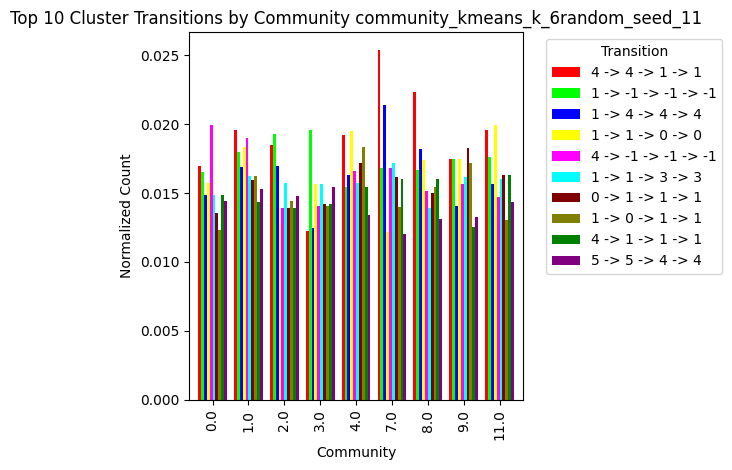

In [17]:
print("Raw transition counts per community:")
print(transitions_filtered)
print("\nNormalized transition proportions per community:")
print(normalized_transitions_filtered)

color_map = [
  "#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF",
  "#00FFFF", "#800000", "#808000", "#008000", "#800080",
  "#008080", "#000080", "#FFA500", "#A52A2A", "#FFC0CB"
]

plt.figure(figsize=(15, 8))
normalized_transitions_filtered.plot(kind='bar', width=0.8, color = color_map)
filename = l2_results_path.split("/")[-1].split(".")[0]
plt.title(f'Top 10 Cluster Transitions by Community {filename}')
plt.xlabel('Community')
plt.ylabel('Normalized Count')
plt.legend(title='Transition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
transitions_per_community

transition_third_order,0 -> -1 -> -1 -> -1,0 -> 0 -> -1 -> -1,0 -> 0 -> 1 -> 1,0 -> 0 -> 2 -> 2,0 -> 0 -> 3 -> 3,0 -> 0 -> 4 -> 4,0 -> 0 -> 5 -> 5,0 -> 1 -> -1 -> -1,0 -> 1 -> 0 -> 0,0 -> 1 -> 1 -> 1,...,5 -> 4 -> 2 -> 2,5 -> 4 -> 3 -> 3,5 -> 4 -> 4 -> 4,5 -> 4 -> 5 -> 5,5 -> 5 -> -1 -> -1,5 -> 5 -> 0 -> 0,5 -> 5 -> 1 -> 1,5 -> 5 -> 2 -> 2,5 -> 5 -> 3 -> 3,5 -> 5 -> 4 -> 4
community,,,,,,,,,,,,,,,,,,,,,
0.0,20,2,11,9,3,5,3,5,17,32,...,10,0,23,32,8,14,12,44,4,34
1.0,43,4,45,25,21,16,11,14,54,100,...,39,2,55,73,27,18,53,66,11,96
2.0,59,10,46,32,28,21,9,12,46,109,...,24,3,65,91,36,32,48,112,11,116
3.0,42,6,44,28,17,4,9,11,42,80,...,26,5,42,55,18,23,40,62,7,87
4.0,23,5,24,8,12,11,3,8,31,59,...,12,0,23,43,13,12,20,55,4,46
7.0,40,3,31,17,13,11,8,7,38,81,...,15,3,37,51,13,19,36,51,5,60
8.0,55,7,46,17,20,21,8,16,46,98,...,29,5,48,65,23,32,54,84,7,86
9.0,29,4,40,12,11,7,5,4,32,70,...,16,6,25,46,15,15,28,32,7,51
11.0,25,2,12,10,10,5,5,1,16,50,...,11,4,24,30,9,7,24,25,6,44


In [19]:
# transitions_per_community[["4 -> 0", "4 -> 2", "4 -> 5", "4 -> 4", "4 -> 3", "4 -> 1"]].div(transitions_per_community[["4 -> 0", "4 -> 2", "4 -> 5", "4 -> 4", "4 -> 3", "4 -> 1"]].sum(axis=1), axis=0).plot(kind='bar', width=0.8, title=f"4 transitions per community {filename}")

C:\Users\dvusuet\AppData\Local\Temp\1\ipykernel_23432\3842513321.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'count'))


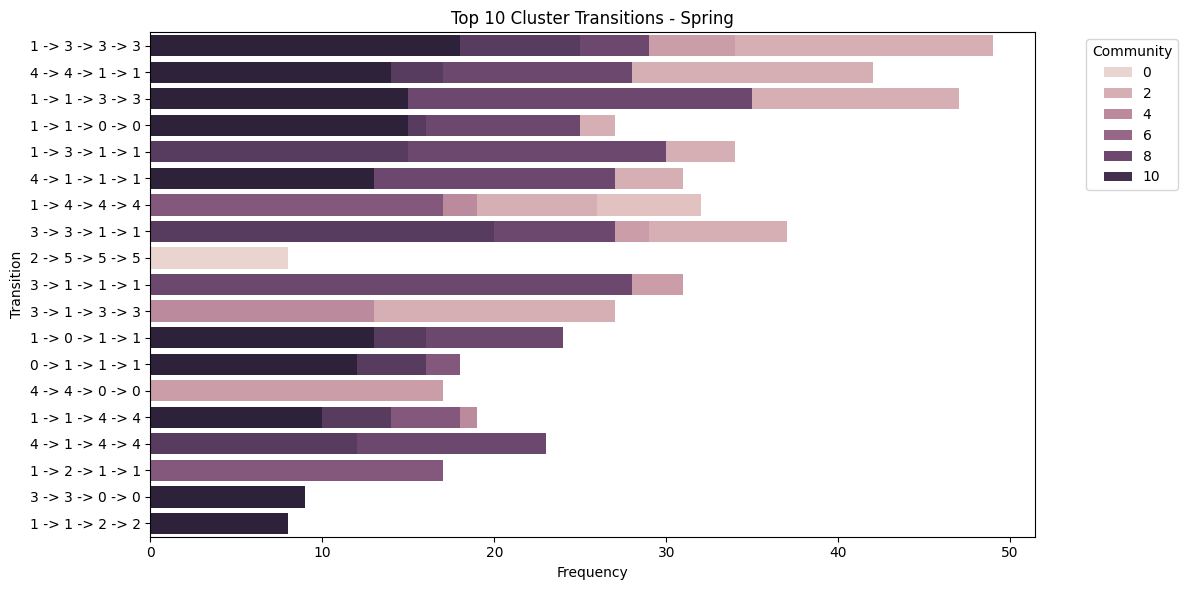

C:\Users\dvusuet\AppData\Local\Temp\1\ipykernel_23432\3842513321.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'count'))


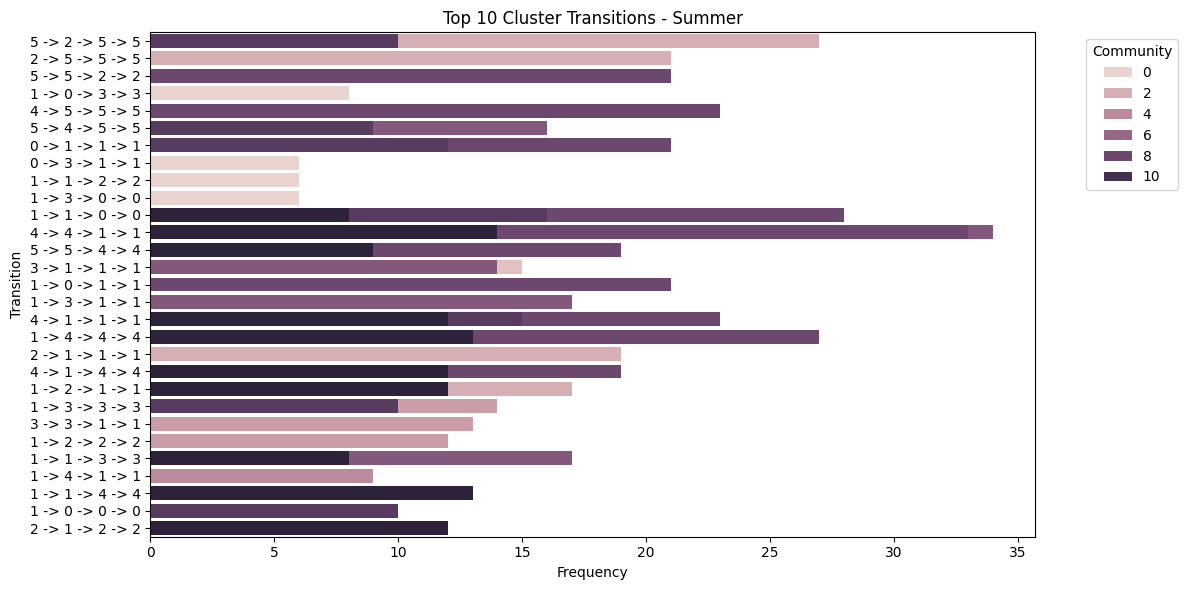

C:\Users\dvusuet\AppData\Local\Temp\1\ipykernel_23432\3842513321.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'count'))


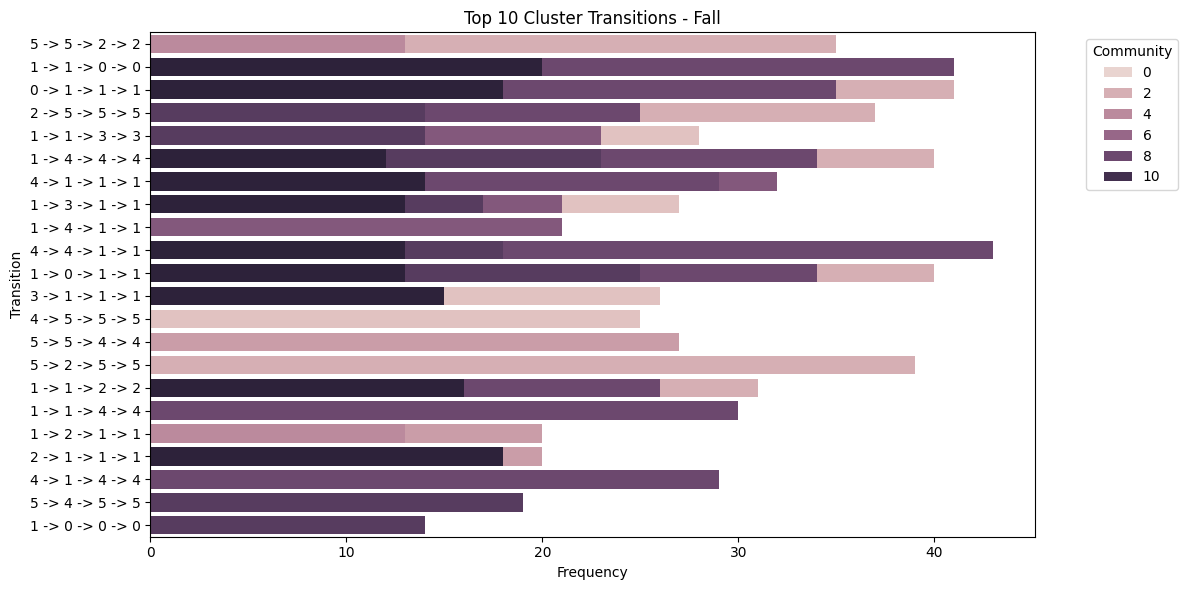

C:\Users\dvusuet\AppData\Local\Temp\1\ipykernel_23432\3842513321.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'count'))


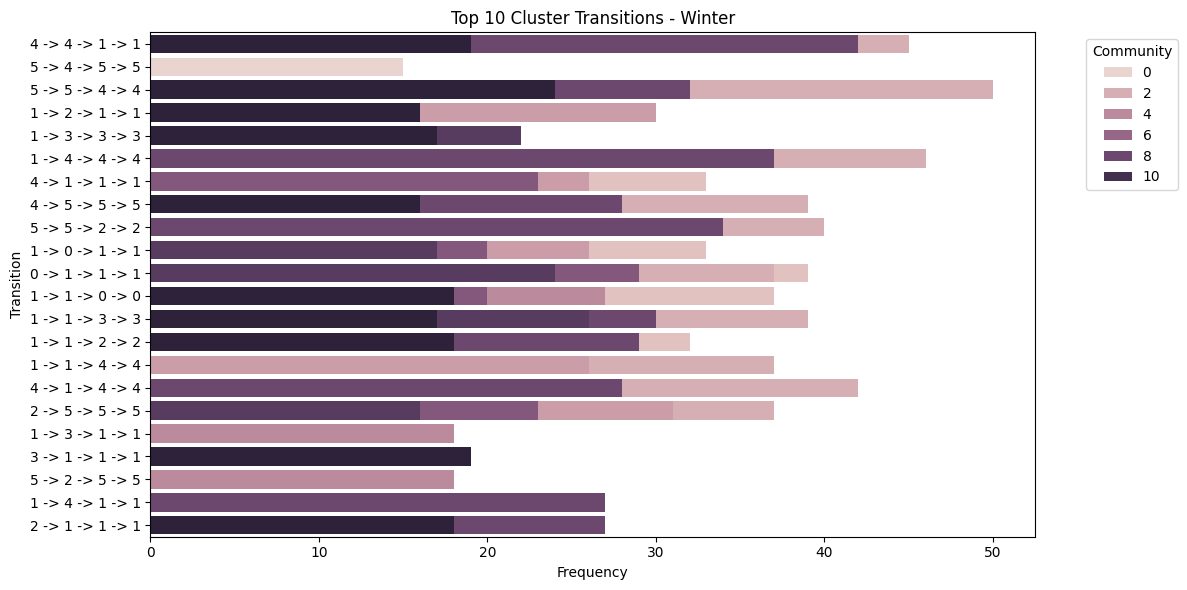

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date to datetime format
df_transitions['date'] = pd.to_datetime(df_transitions['date'])

# Define function to assign seasons
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Winter"

# Apply season categorization
df_transitions['season'] = df_transitions['date'].apply(get_season)
df_transitions = df_transitions[~df_transitions['transition_third_order'].str.contains('-1')]

# Loop through seasons and plot top 10 transitions per community
seasons = ["Spring", "Summer", "Fall", "Winter"]
for season in seasons:
    df_season = df_transitions[df_transitions['season'] == season]
    
    # Count occurrences of transitions per community
    transition_counts = (
        df_season.groupby(['community', 'transition_third_order'])
        .size()
        .reset_index(name='count')
    )
    
    # Get top 10 transitions per community
    top_transitions = (
        transition_counts.groupby('community')
        .apply(lambda x: x.nlargest(10, 'count'))
        .reset_index(drop=True)
    )

    # Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_transitions,
        x="count",
        y="transition_third_order",
        hue="community",
        dodge=False
    )
    plt.title(f"Top 10 Cluster Transitions - {season}")
    plt.xlabel("Frequency")
    plt.ylabel("Transition")
    plt.legend(title="Community", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


C:\Users\dvusuet\AppData\Local\Temp\1\ipykernel_23432\2923132935.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'count'))
C:\Users\dvusuet\AppData\Local\Temp\1\ipykernel_23432\2923132935.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_yticklabels(np.round(axes.get_yticks(),2), fontsize=13)
C:\Users\dvusuet\AppData\Local\Temp\1\ipykernel_23432\2923132935.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pa

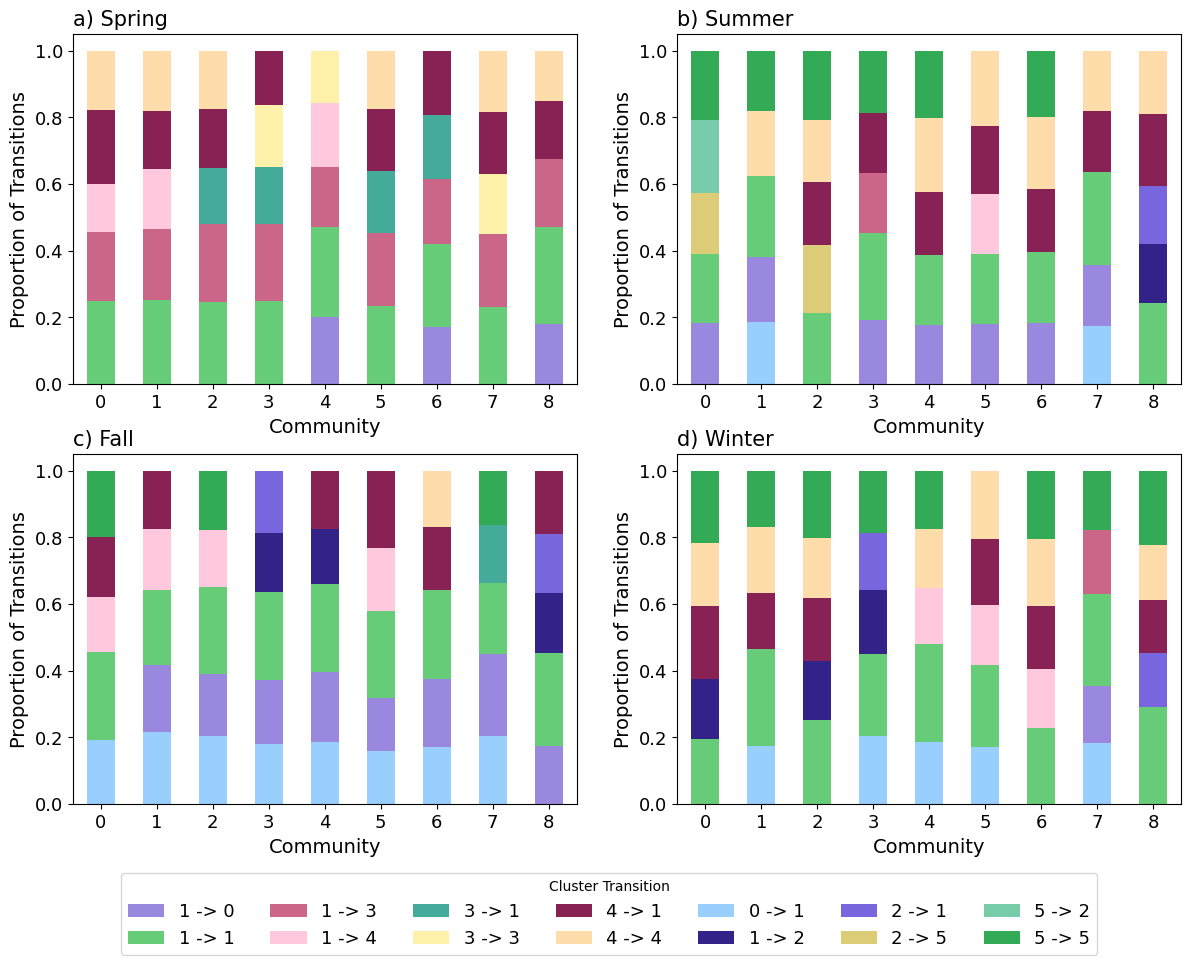

In [177]:
'''Filters by season using the date column.
Counts transition occurrences per community.
Selects the top 10 transitions for each community.
Normalizes the counts to proportions for visualization.
Plots a stacked bar chart for each season.'''

import pandas as pd
import matplotlib.pyplot as plt

# Convert date column to datetime format
df_transitions['date'] = pd.to_datetime(df_transitions['date'])

# Function to classify seasons
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Winter"

# Assign seasons
df_transitions['season'] = df_transitions['date'].apply(get_season)



# Loop through seasons and plot distribution of top 10 transitions per community
fig, ax = plt.subplots(2, 2, figsize=(14.3, 10))
seasons = ["Spring", "Summer", "Fall", "Winter"]
i=0
handles = []
labels = []
custom_map = ListedColormap(lighter_palette)

# color_map = {}

# #print df_transition unique transition column values
# for i, transition in enumerate(df_transitions["transition"].unique()):
#     color_map[transition] = lighter_palette[i]

color_map = {df_transitions["transition"].unique()[i]:  lighter_palette[i] for i in range(len(df_transitions["transition"].unique()))}
for season in seasons:
    if season == "Spring":
        axes = ax[0, 0]
    elif season == "Summer":
        axes = ax[0, 1]
    elif season == "Fall":
        axes = ax[1, 0]
    else:
        axes = ax[1, 1]        
    df_season = df_transitions[df_transitions["season"] == season]
    
    # Count occurrences of each transition per community
    transition_counts = df_season.groupby(["community", "transition"]).size().reset_index(name="count")
    
    # Select top 10 transitions per community
    top_transitions = (
        transition_counts.groupby("community")
        .apply(lambda x: x.nlargest(5, 'count'))
        .reset_index(drop=True)
    )

    # Pivot the data for a stacked bar chart
    transition_distribution = top_transitions.pivot(index="community", columns="transition", values="count").fillna(0)
    
    # Normalize to show proportions
    transition_distribution = transition_distribution.div(transition_distribution.sum(axis=1), axis=0)

    #print season and transition distribution column names
    
    color_season = [color_map[key] for key in transition_distribution.columns if key in color_map]
    
    # Plot stacked bar chart
    transition_distribution.plot(ax = axes, kind="bar", stacked=True, color=color_season, legend=None)
    axes.set_xticks(np.arange(9), range(0,9), fontsize=13, rotation=0)
    axes.set_xlabel("Community", fontsize=14)
    axes.set_ylabel("Proportion of Transitions", fontsize=14)
    #set ytick labels to font size 12
    axes.set_yticklabels(np.round(axes.get_yticks(),2), fontsize=13)
    label = ['a', 'b', 'c', 'd']
    axes.set_title(label[i] + ') '+f"{season}", loc='left', fontsize=15)
    a, b = axes.get_legend_handles_labels()
    handles.extend(a)
    labels.extend(b)
    i+=1


# Labels & title
#plt.title(f"Top 5 Cluster Transition Distribution - {season}")
    
# make a legend that takes the colors from all the bars on all axes
#handles, labels = axes.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
#fig.legend(title="Cluster Transition", handles=handles, labels = labels, loc='upper center', ncol=2)

fig.legend(title="Cluster Transition", handles=by_label.values(), labels = by_label.keys(), loc='lower center',bbox_to_anchor=(0.5, -0.05), ncol=7, fontsize=13)
#fig.legend(title="Cluster Transition", bbox_to_anchor=(1.05, 1.5), loc='upper l')

#set xtick labels to community numbers 1-9 


#plt.tight_layout()
#save as pdf with bbox extent


plt.savefig('Figures/community_by_season.pdf',  bbox_inches='tight')
plt.show()


In [73]:
top_transitions

,community,transition,count
0,0.0,4 -> 1,41
1,0.0,5 -> 5,41
2,0.0,1 -> 1,37
3,0.0,4 -> 4,36
4,0.0,1 -> 2,34
5,1.0,1 -> 1,148
6,1.0,4 -> 4,100
7,1.0,0 -> 1,89
8,1.0,4 -> 1,86
9,1.0,5 -> 5,86


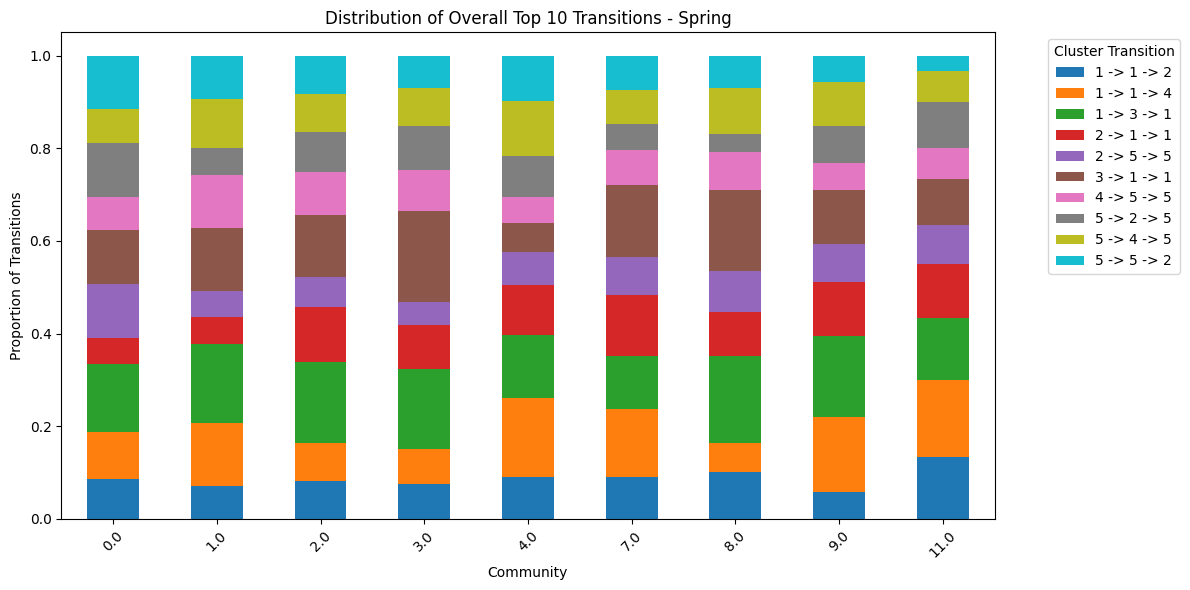

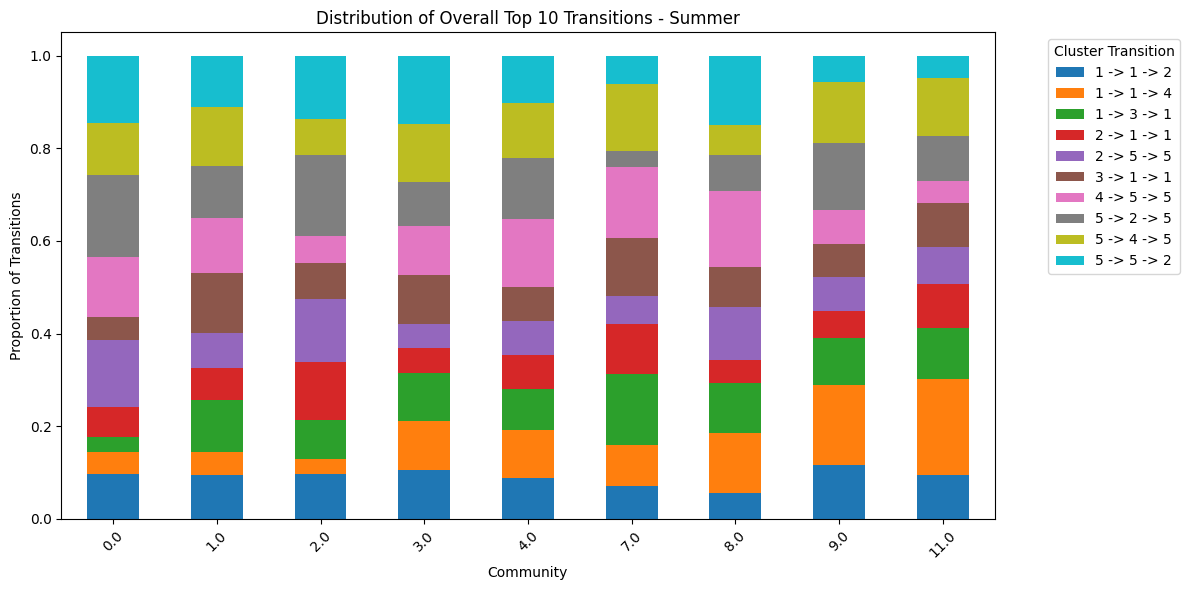

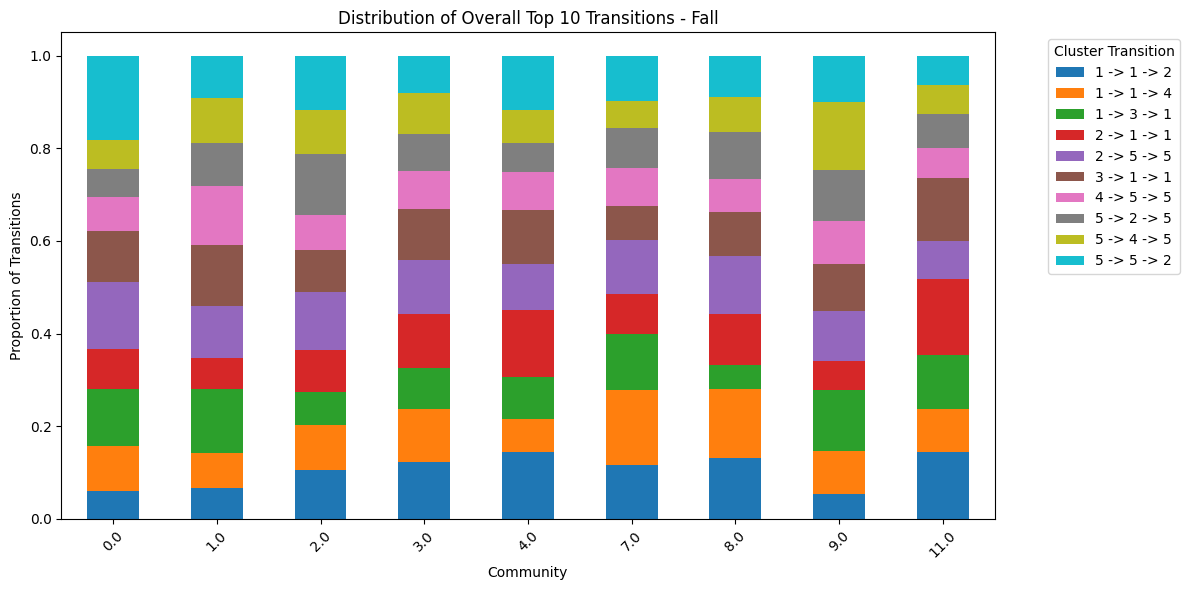

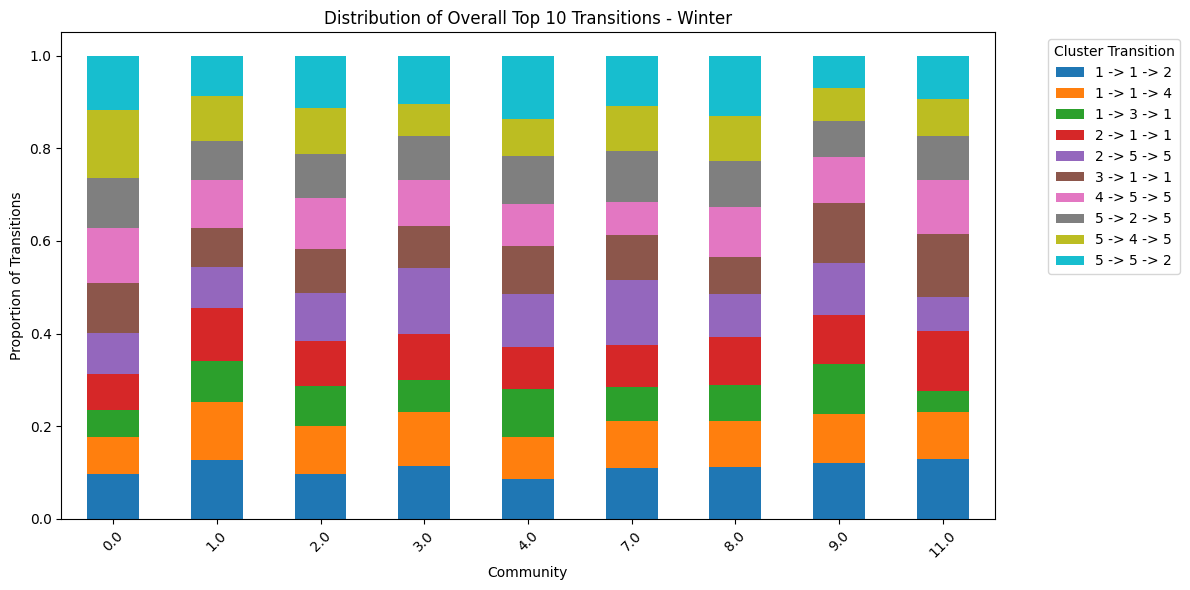

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime format
df_transitions['date'] = pd.to_datetime(df_transitions['date'])

# Function to classify seasons
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Winter"

# Assign seasons
df_transitions['season'] = df_transitions['date'].apply(get_season)

# Filter out rows where 'transition_third_order' contains '-1'
df_transitions_filtered = df_transitions[~df_transitions['transition_second_order'].str.contains('-1')]

# Identify overall top 10 most frequent transitions across all communities and seasons
overall_top_transitions = (
    df_transitions_filtered['transition_second_order']
    .value_counts()
    .head(20)
    .tail(10)
    .index.tolist()
)

# Loop through seasons and analyze the distribution of these top 10 transitions
seasons = ["Spring", "Summer", "Fall", "Winter"]
for season in seasons:
    df_season = df_transitions_filtered[df_transitions_filtered["season"] == season]

    # Filter only for the overall top 10 transitions
    df_season_filtered = df_season[df_season["transition_second_order"].isin(overall_top_transitions)]

    # Count occurrences per community
    transition_counts = (
        df_season_filtered.groupby(["community", "transition_second_order"])
        .size()
        .reset_index(name="count")
    )

    # Pivot for stacked bar chart
    transition_distribution = transition_counts.pivot(index="community", columns="transition_second_order", values="count").fillna(0)

    # Normalize to show proportions
    transition_distribution = transition_distribution.div(transition_distribution.sum(axis=1), axis=0)

    # Plot stacked bar chart
    transition_distribution.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

    # Labels & title
    plt.title(f"Distribution of Overall Top 10 Transitions - {season}")
    plt.xlabel("Community")
    plt.ylabel("Proportion of Transitions")
    plt.legend(title="Cluster Transition", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [24]:
# top_transitions

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date column to datetime format
df_transitions['date'] = pd.to_datetime(df_transitions['date'])

# Function to classify seasons
def get_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"
    else:
        return "Winter"

# Assign seasons
df_transitions['season'] = df_transitions['date'].apply(get_season)

# Filter out transitions containing '-1'
df_transitions_filtered = df_transitions[~df_transitions['transition'].str.contains('-1')]

# Identify the most frequently occurring transitions across all seasons
top_transitions = (
    df_transitions_filtered['transition_second_order']
    .value_counts()
    .head(10)  # Change this number if you want more or fewer transitions
    .index.tolist()
)

# Define a consistent color map
color_map = plt.get_cmap("tab10")  # Uses a standard matplotlib colormap
color_dict = {transition: color_map(i) for i, transition in enumerate(top_transitions)}

# Loop through seasons and analyze the distribution of these top transitions
seasons = ["Spring", "Summer", "Fall", "Winter"]
for season in seasons:
    df_season = df_transitions_filtered[df_transitions_filtered["season"] == season]

    # Filter only for the most frequent transitions
    df_season_filtered = df_season[df_season["transition"].isin(top_transitions)]

    # Count occurrences per community
    transition_counts = (
        df_season_filtered.groupby(["community", "transition"])
        .size()
        .reset_index(name="count")
    )

    # Pivot for stacked bar chart
    transition_distribution = transition_counts.pivot(index="community", columns="transition", values="count").fillna(0)

    # Normalize to show proportions
    transition_distribution = transition_distribution.div(transition_distribution.sum(axis=1), axis=0)

    # Plot stacked bar chart with consistent colors
    ax = transition_distribution.plot(kind="bar", stacked=True, figsize=(12, 6),
                                      color=[color_dict[t] for t in transition_distribution.columns])

    # Labels & title
    plt.title(f"Distribution of Most Frequent Transitions - {season}")
    plt.xlabel("Community")
    plt.ylabel("Proportion of Transitions")
    plt.legend(title="Cluster Transition", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


TypeError: no numeric data to plot